In [12]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
#cargamos los datos de entrada
data = pd.read_csv("covid19_tweets2.csv")
#veamos cuantas dimensiones y registros contiene
data.shape

(179108, 14)

In [14]:
#son 179108 registros con 14 columnas. Veamos los primeros registros
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,Columna1,date,text,hashtags,source,is_retweet
0,·èâ·é•‚òª’¨ÍÇÖœÆ,astroworld,wednesday addams as a disney princess keepin i...,26/05/17 5:46,624,950,18775,False,0,25/07/20 12:27,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile üá∫üá∏,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",16/04/09 20:06,2253,1677,24,True,1,25/07/20 12:27,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,28/02/09 18:57,9275,9525,7254,False,0,25/07/20 12:27,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,07/03/19 1:45,197,987,1488,False,0,25/07/20 12:27,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,üñäÔ∏èOfficial Twitter handle of Department o...,12/02/17 6:45,101009,168,101,False,0,25/07/20 12:27,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [15]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,user_followers,user_friends,user_favourites,Columna1
count,1.791080e+05,179108.000000,1.791080e+05,179108.000000
mean,1.090555e+05,2121.701566,1.444411e+04,0.128945
std,8.414670e+05,9162.553072,4.452270e+04,0.335139
min,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1.720000e+02,148.000000,2.060000e+02,0.000000
50%,9.920000e+02,542.000000,1.791000e+03,0.000000
75%,5.284000e+03,1725.250000,9.388000e+03,0.000000
max,4.944256e+07,497363.000000,2.047197e+06,1.000000


In [66]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dX = data[['user_followers']]
X_train = np.array(dX)
y_train = data['user_favourites'].values
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [-0.00154596]
Independent term: 
 14612.701664198194
Mean squared error: 1980567380.11
Variance score: 0.00


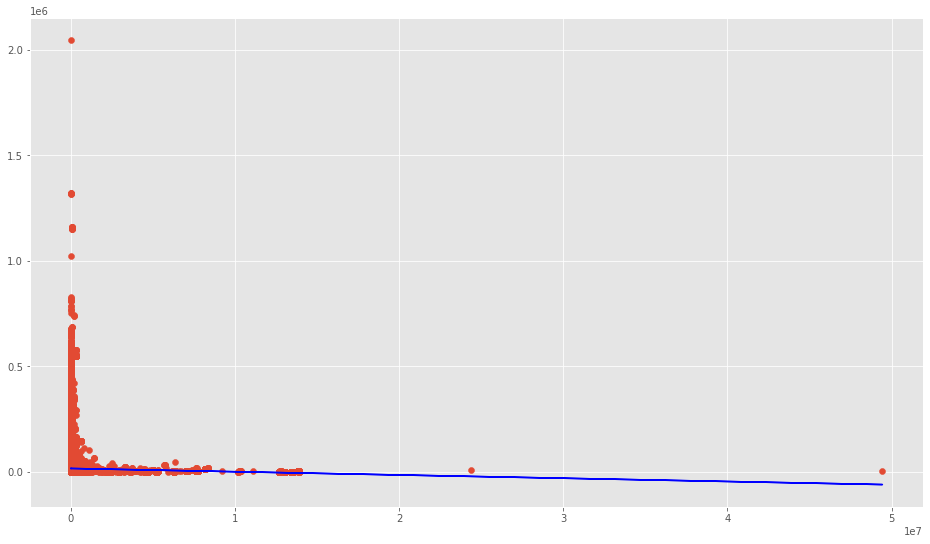

In [67]:
YY =-0.00154596*data['user_followers'] + 14612.701664198194
plt.scatter(data['user_followers'],data['user_favourites'])
plt.plot(data['user_followers'], YY, color='blue')